In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

In [0]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
from tensorflow.keras.applications import VGG16

In [0]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
len(model.trainable_weights)

30

In [0]:
conv_base.trainable = False

In [0]:
len(model.trainable_weights)

4

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                  shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)             #Don't augment validation data

In [0]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 32, class_mode = 'binary')

valid_generator = test_datagen.flow_from_directory(valid_dir, target_size = (150, 150), batch_size = 32, class_mode = 'binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [0]:
model.compile(optimizer = RMSprop(lr = 2e-5), loss = 'binary_crossentropy', metrics = ['acc'])

In [0]:
history = model.fit(train_generator, steps_per_epoch = 100, epochs = 30, 
                      validation_data = valid_generator, validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 1753s 18s/step - loss: 0.4890 - acc: 0.7847 - val_loss: 0.3915 - val_acc: 0.8662
Epoch 2/30
100/100 [==============================] - 1441s 14s/step - loss: 0.3984 - acc: 0.8256 - val_loss: 0.3793 - val_acc: 0.8568
Epoch 3/30
100/100 [==============================] - 1095s 11s/step - loss: 0.3855 - acc: 0.8394 - val_loss: 0.3704 - val_acc: 0.8687
Epoch 4/30
100/100 [==============================] - 1090s 11s/step - loss: 0.3747 - acc: 0.8428 - val_loss: 0.3921 - val_acc: 0.8536
Epoch 5/30
100/100 [==============================] - 1102s 11s/step - loss: 0.3772 - acc: 0.8441 - val_loss: 0.4163 - val_acc: 0.8473
Epoch 6/30
100/100 [==============================] - 1165s 12s/step - loss: 0.3538 - acc: 0.8534 - val_loss: 0.3754 - val_acc: 0.8675
Epoch 7/30
100/100 [==============================] - 1148s 11s/step - loss: 0.3427 - acc: 0.8578 - val_loss: 0.3894 - val_acc: 0.8599
Epoch 8/30
100/100 [==============================] - 6

In [0]:
import matplotlib.pyplot as plt

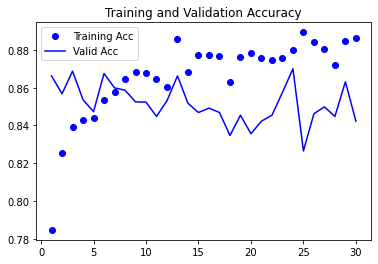

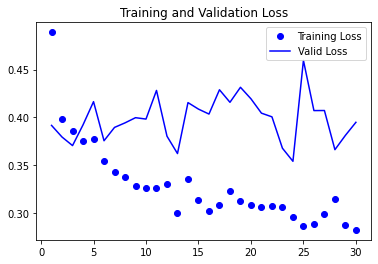

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Valid Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Valid Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [0]:
model.save('/content/drive/My Drive/wasteclass1_colab.h5')

In [0]:
valid_generator.class_indices

{'O': 0, 'R': 1}